In [1]:
import xarray as xr
import matplotlib.pyplot as plt
# %matplotlib notebook

/opt/tljh/user/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
ncfile = '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230420_20230423.nc'
ds = xr.open_dataset(ncfile)

ds

<xarray.Dataset>
Dimensions:                    (time: 36455)
Coordinates:
  * time                       (time) datetime64[ns] 2023-04-20T00:09:49.2323...
    longitude                  (time) float64 ...
    latitude                   (time) float64 ...
Data variables:
    longitude_theoretical      (time) float64 ...
    latitude_theoretical       (time) float64 ...
    distance_from_theoretical  (time) float64 ...
    cycle                      (time) int16 ...
    track                      (time) int16 ...
    sla_unfiltered             (time) float32 ...
    dac                        (time) float32 ...
    ib_lf                      (time) float32 ...
    ocean_tide                 (time) float32 ...
    internal_tide              (time) float32 ...
    mdt                        (time) float32 ...
    flag                       (time) float32 ...
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-3 sea ...
    time_coverage_duration:          P23H18M6.849733S
    time_coverage_end:               2023-04-20T23:27:56Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-04-20T00:09:49Z
    title:                           NRT SWOT nadir 1day Global Ocean Along t...

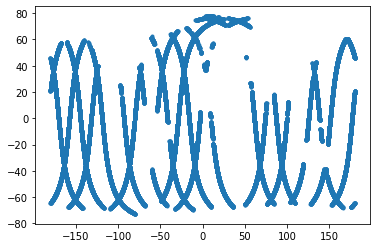

In [3]:
plt.figure()
plt.plot(ds.longitude, ds.latitude,'.')

In [11]:
myds = ds.where( (ds.longitude>122) & (ds.longitude < 124) & (ds.latitude>-14.5) & (ds.latitude<-12), drop=True )

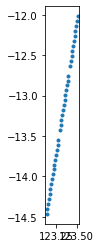

In [12]:
plt.figure()
plt.plot(myds.longitude, myds.latitude,'.')
plt.gca().set_aspect('equal')


In [13]:
myds

<xarray.Dataset>
Dimensions:                    (time: 39)
Coordinates:
  * time                       (time) datetime64[ns] 2023-04-20T11:59:16.2545...
    longitude                  (time) float64 123.1 123.1 123.1 ... 123.5 123.5
    latitude                   (time) float64 -14.46 -14.4 ... -12.08 -12.02
Data variables:
    longitude_theoretical      (time) float64 123.1 123.1 123.1 ... 123.5 123.5
    latitude_theoretical       (time) float64 -14.46 -14.4 ... -12.08 -12.02
    distance_from_theoretical  (time) float64 0.06961 0.0681 ... 0.1321 0.1355
    cycle                      (time) float64 496.0 496.0 496.0 ... 496.0 496.0
    track                      (time) float64 21.0 21.0 21.0 ... 21.0 21.0 21.0
    sla_unfiltered             (time) float32 0.169 0.127 0.13 ... 0.08 0.066
    dac                        (time) float32 -0.005 -0.004 ... 0.007 0.008
    ib_lf                      (time) float32 0.003 0.003 0.003 ... 0.007 0.007
    ocean_tide                 (time) float32 -0.42 -0.391 ... -0.28 -0.295
    internal_tide              (time) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    mdt                        (time) float32 1.004 1.005 1.005 ... 0.999 0.998
    flag                       (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-3 sea ...
    time_coverage_duration:          P23H18M6.849733S
    time_coverage_end:               2023-04-20T23:27:56Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-04-20T00:09:49Z
    title:                           NRT SWOT nadir 1day Global Ocean Along t...

In [14]:
xr.combine_by_coords?

In [15]:
def open_file(ff):
    ds = xr.open_dataset(ff)
    myds =  ds.where( (ds.longitude>122) & (ds.longitude < 124) & (ds.latitude>-14.5) & (ds.latitude<-12.5), drop=True )
    return myds

In [7]:

from glob import glob
ncfiles = sorted(glob('/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_2023*.nc'))


In [8]:
import re

# go through and select the last file produced for each date

files = {}
for ff in ncfiles:
    match = re.search( r'\d{4}\d{2}\d{2}_\d{4}\d{2}\d{2}',ff)
    t1, t2 = match.group().split('_')
    if ff not in files.keys():
        files.update({t1:ff})
    else:
        files[t1] = ff

myfiles = []
for ff in files.keys():
    myfiles.append(files[ff])
myfiles

['/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230316_20230321.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230317_20230327.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230318_20230327.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230319_20230327.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230320_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230321_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230322_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230323_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230324_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230325_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230326_20230330.nc',
 '/data-obs/jupyter-ubuntu/SWOT/nrt_global_swonc_phy_l3_1hz_20230327_20230401.nc',
 '/d

In [18]:
len(myfiles), 70*40

(69, 2800)

In [19]:

ds_list = [open_file(ff) for ff in ncfiles]

# ds = xr.merge(ds_list, compat='override', join='right', combine_attrs='override')
ds = xr.concat(ds_list, 'time')
# ds = xr.combine_by_coords(ds_list)
# ds = xr.open_mfdataset(ds_list, combine='nested', )


ds

<xarray.Dataset>
Dimensions:                    (time: 5457)
Coordinates:
  * time                       (time) datetime64[ns] 2023-03-16T17:27:12.8417...
    longitude                  (time) float64 123.2 123.2 123.2 ... 123.4 123.4
    latitude                   (time) float64 -14.34 -14.22 ... -12.57 -12.51
Data variables:
    longitude_theoretical      (time) float64 123.1 123.2 123.2 ... 123.4 123.4
    latitude_theoretical       (time) float64 -14.34 -14.22 ... -12.57 -12.51
    distance_from_theoretical  (time) float64 0.5697 0.5678 ... 0.5518 0.5502
    cycle                      (time) float64 461.0 461.0 461.0 ... 552.0 552.0
    track                      (time) float64 21.0 21.0 21.0 ... 21.0 21.0 21.0
    sla_unfiltered             (time) float32 0.171 0.126 0.127 ... 0.15 0.17
    dac                        (time) float32 0.003 0.002 ... -0.036 -0.036
    ib_lf                      (time) float32 0.016 0.016 ... -0.016 -0.015
    ocean_tide                 (time) float32 -0.337 -0.338 ... 0.194 0.196
    internal_tide              (time) float32 0.0 0.0 0.0 ... -0.003 -0.004
    mdt                        (time) float32 1.005 1.008 1.01 ... 1.021 1.019
    flag                       (time) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by altimeter...
    contact:                         aviso@altimetry.fr
    creator_email:                   aviso@altimetry.fr
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-3 sea ...
    time_coverage_duration:          P23H51M44.812667S
    time_coverage_end:               2023-03-16T23:59:58Z
    time_coverage_resolution:        P1S
    time_coverage_start:             2023-03-16T00:08:13Z
    title:                           NRT SWOT nadir 1day Global Ocean Along t...

In [29]:
ds.latitude[1000:1100]

<xarray.DataArray 'latitude' (time: 100)>
array([-12.998609, -12.937454, -12.876298, -12.815141, -12.753982,
       -12.692823, -12.631662, -12.570499, -12.509336, -14.462887,
       -14.401763, -14.340638, -14.279512, -14.218384, -14.157254,
       -14.096124, -14.034992, -13.973859, -13.915781, -13.854645,
       -13.793508, -13.73237 , -13.610089, -13.487803, -13.426658,
       -13.365512, -13.304365, -13.243216, -13.182066, -13.120915,
       -13.059763, -12.998609, -12.937454, -12.876298, -12.815141,
       -12.753982, -12.692823, -12.631662, -12.570499, -12.509336,
       -14.46339 , -14.402266, -14.34114 , -14.280013, -14.218884,
       -13.974357, -13.852085, -13.790947, -13.732865, -13.671724,
       -13.610583, -13.54944 , -13.488295, -13.42715 , -13.366003,
       -13.304855, -13.243706, -13.182555, -13.121403, -13.06025 ,
       -12.999096, -12.93794 , -12.876783, -12.815625, -12.754466,
       -12.632144, -12.570981, -12.509817, -14.46339 , -14.402266,
       -14.34114 , -14.280013, -14.218884, -13.974357, -13.852085,
       -13.790947, -13.732865, -13.671724, -13.610583, -13.54944 ,
       -13.488295, -13.42715 , -13.366003, -13.304855, -13.243706,
       -13.182555, -13.121403, -13.06025 , -12.999096, -12.93794 ,
       -12.876783, -12.815625, -12.754466, -12.632144, -12.570981,
       -12.509817, -14.46339 , -14.402266, -14.34114 , -14.280013])
Coordinates:
  * time       (time) datetime64[ns] 2023-03-29T15:25:48.081986048 ... 2023-0...
    longitude  (time) float64 123.4 123.4 123.4 123.4 ... 123.1 123.2 123.2
    latitude   (time) float64 -13.0 -12.94 -12.88 -12.82 ... -14.4 -14.34 -14.28
Attributes:
    long_name:      Latitude of measurement
    standard_name:  latitude
    units:          degrees_north

In [21]:
%matplotlib notebook

<IPython.core.display.Javascript object>


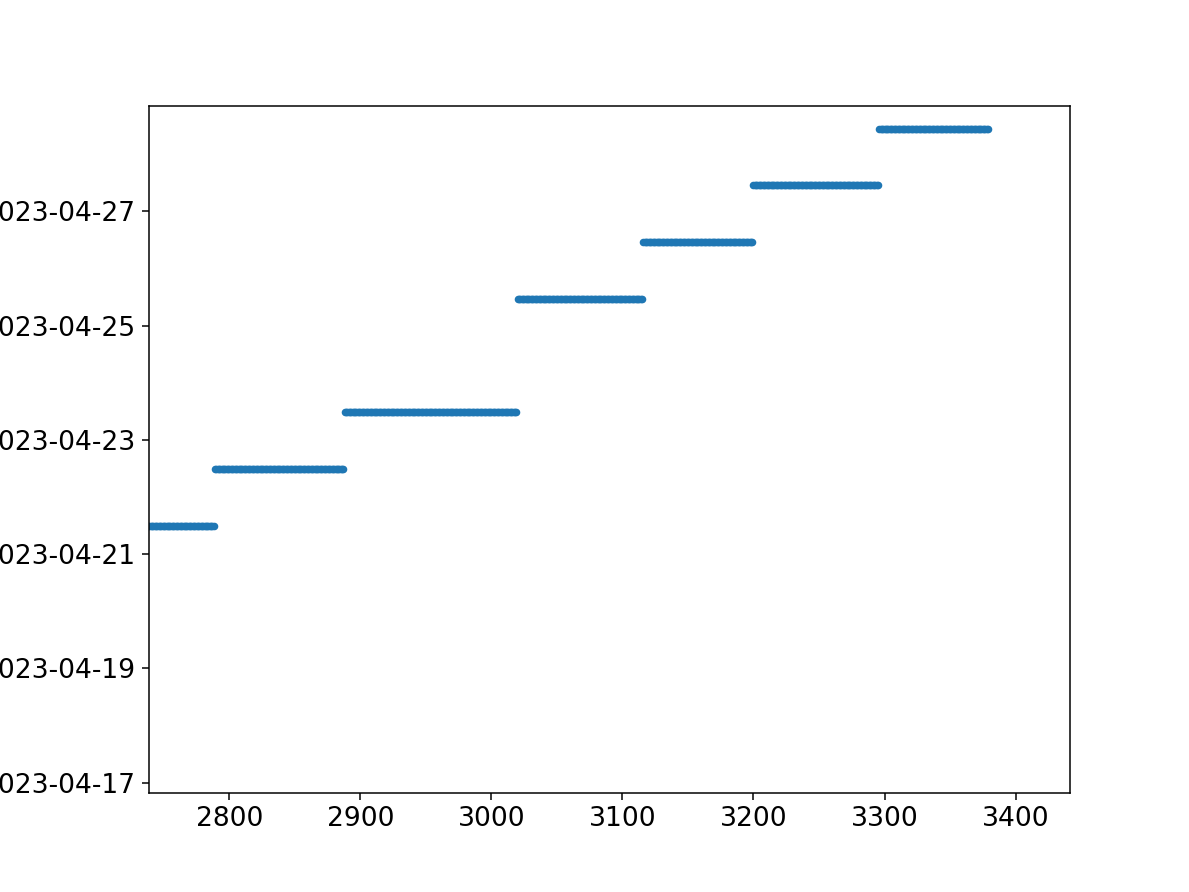

In [22]:
plt.figure()
plt.plot(ds.time,'.')

In [35]:
# Drop dubplicate time records (not sure why they still exist??)
#https://stackoverflow.com/questions/51058379/drop-duplicate-times-in-xarray
import numpy as np
_, index = np.unique(ds['time'], return_index=True)

ds = ds.isel(time=index)

<IPython.core.display.Javascript object>


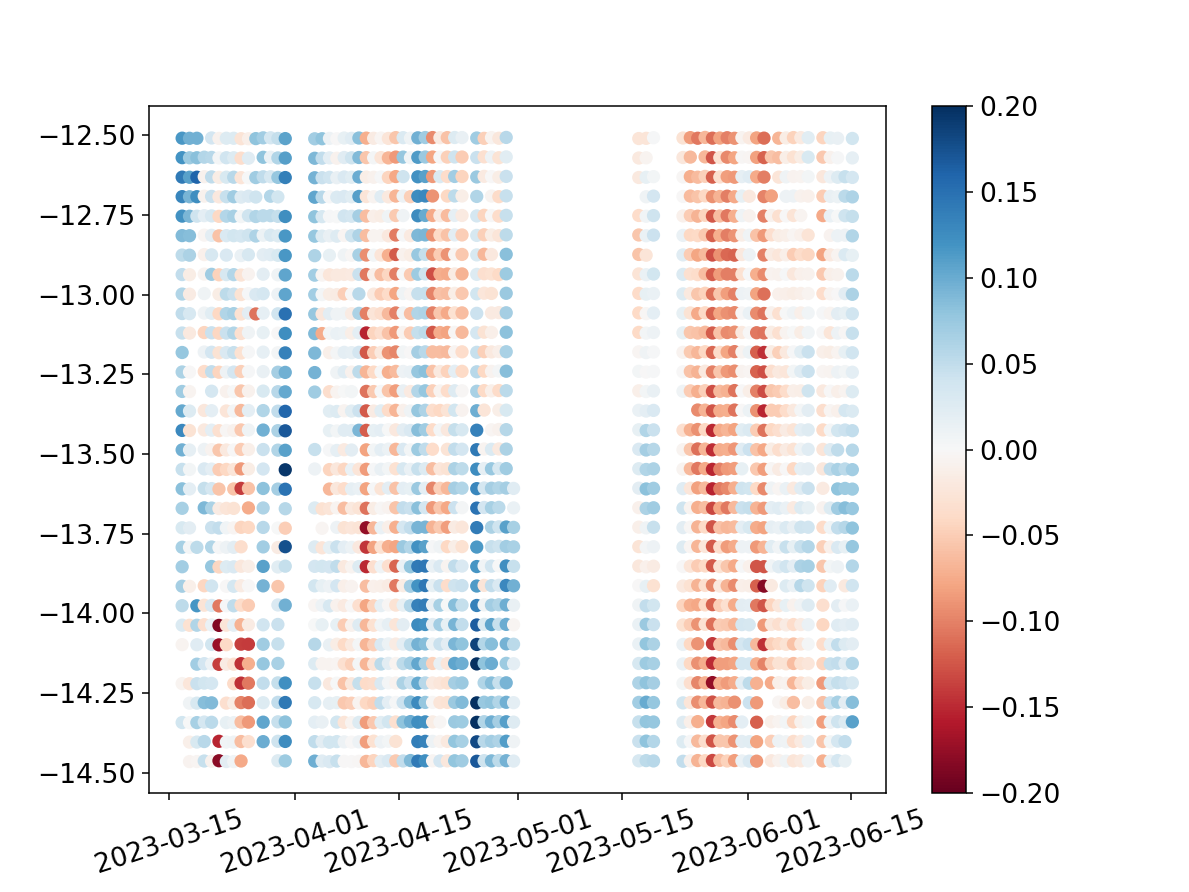

(array([19431., 19448., 19462., 19478., 19492., 19509., 19523.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [36]:
plt.figure()
plt.scatter(ds.time, ds.latitude, c=ds.sla_unfiltered - ds.sla_unfiltered.mean(), cmap='RdBu', vmin=-0.2, vmax=0.2)
plt.colorbar()
plt.xticks(rotation=18)

<IPython.core.display.Javascript object>


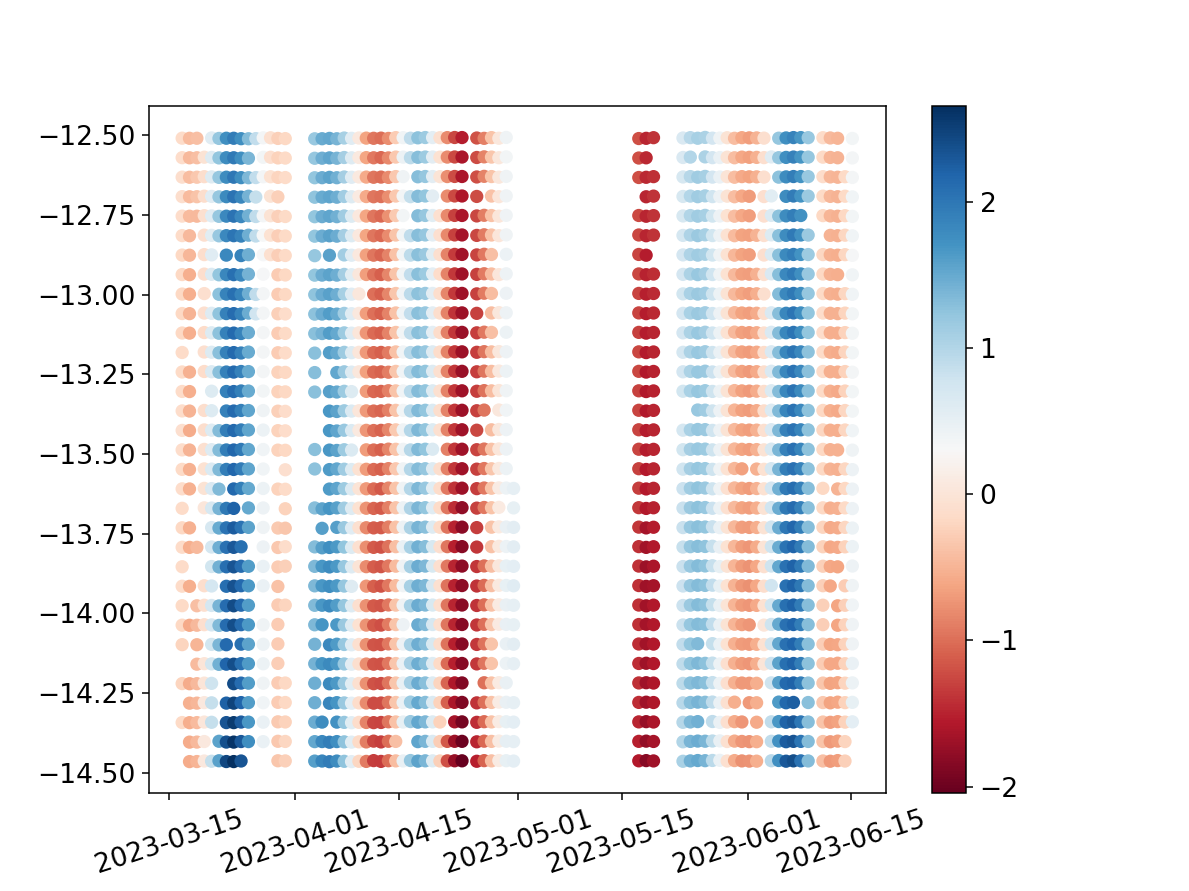

(array([19431., 19448., 19462., 19478., 19492., 19509., 19523.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [37]:
plt.figure()
plt.scatter(ds.time, ds.latitude, c=ds.sla_unfiltered+ds.ocean_tide, cmap='RdBu')
plt.colorbar()
plt.xticks(rotation=18)

<IPython.core.display.Javascript object>


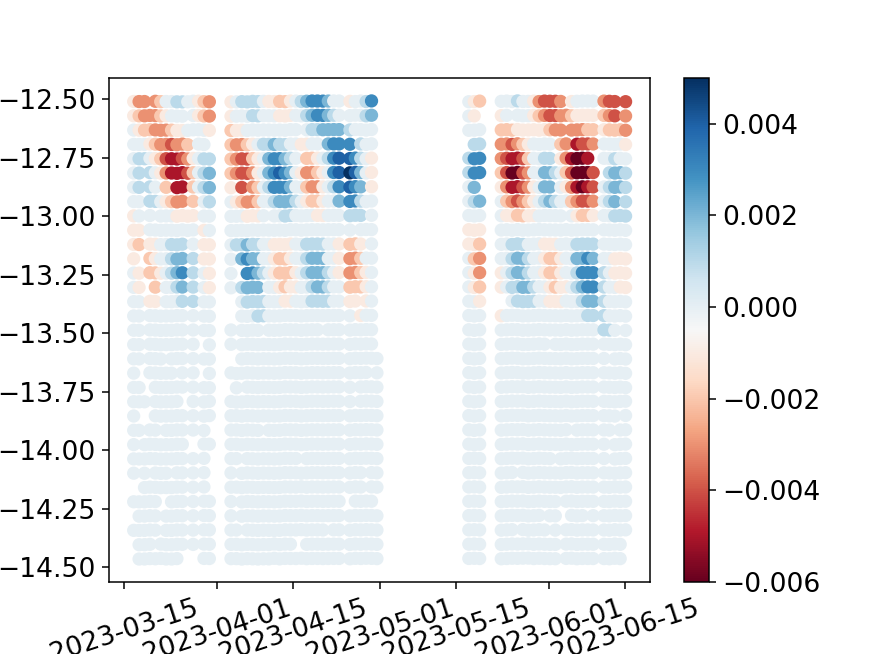

(array([19431., 19448., 19462., 19478., 19492., 19509., 19523.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [38]:
plt.figure()
plt.scatter(ds.time, ds.latitude, c=ds.internal_tide, cmap='RdBu')
plt.colorbar()
plt.xticks(rotation=18)

<IPython.core.display.Javascript object>


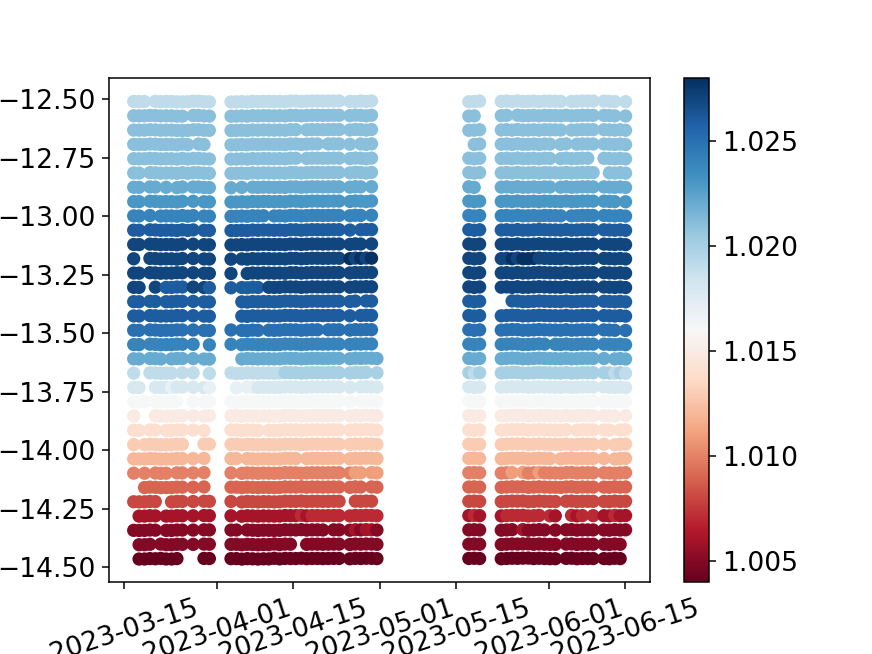

(array([19431., 19448., 19462., 19478., 19492., 19509., 19523.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [39]:
plt.figure()
plt.scatter(ds.time, ds.latitude, c=ds.mdt, cmap='RdBu')
plt.colorbar()
plt.xticks(rotation=18)

In [40]:
# outfile = '/data-obs/jupyter-ubuntu/SWOT/SWOT_nadir_BrowseBasin_MarApr2023.nc'
outfile = '/data-obs/jupyter-ubuntu/SWOT/SWOT_nadir_BrowseBasin_MarJun2023_v2.nc'

ds.to_netcdf(outfile)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SerializationWarning: saving variable longitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  after removing the cwd from sys.path.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: SerializationWarning: saving variable latitude with floating point data as an integer dtype without any _FillValue to use for NaNs
  after removing the cwd from sys.path.
